## RCNN网络
### 理论部分学习记录

- `阅读博客`[回归损失函数1：L1 loss, L2 loss以及Smooth L1 Loss的对比](https://www.cnblogs.com/wangguchangqing/p/12021638.html)

- **RCNN架构演化**
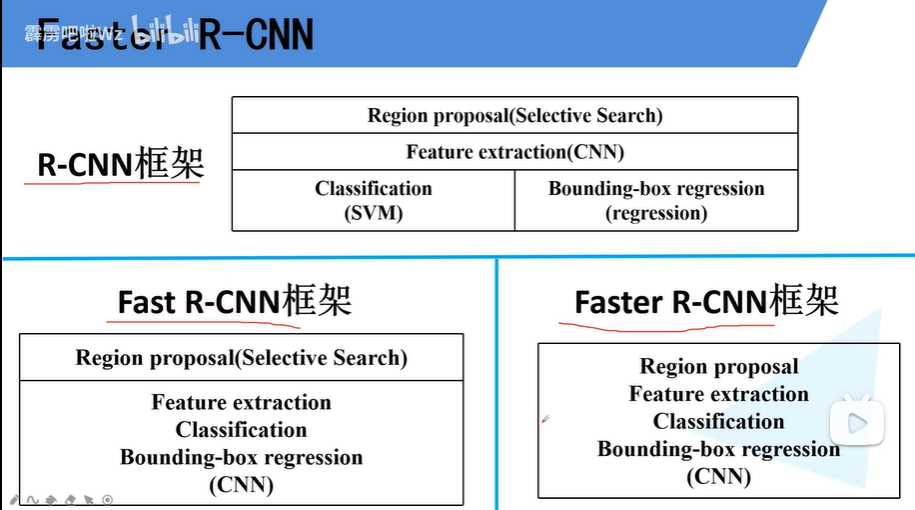

- **FPN结构**
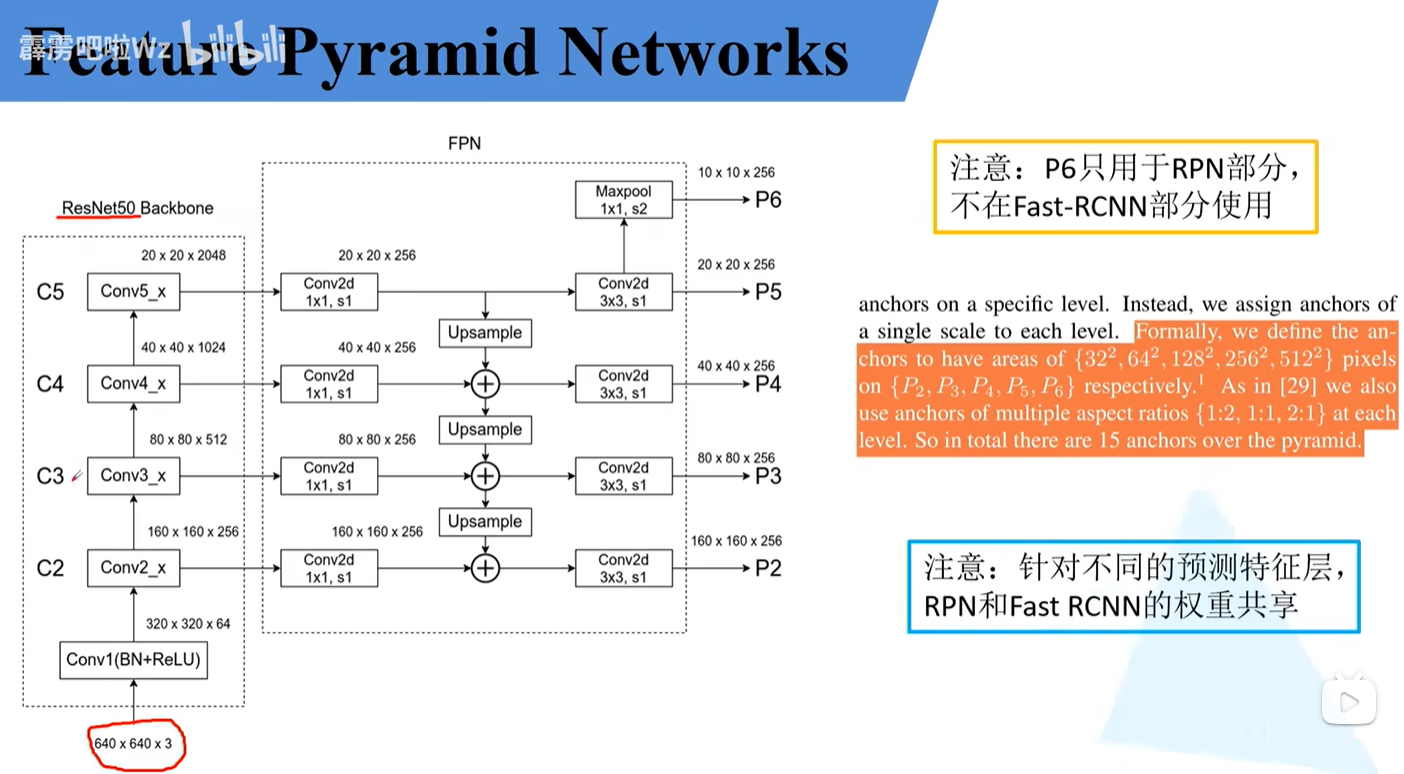

- RPN得到的提议框最后在哪个特征金字塔上做预测
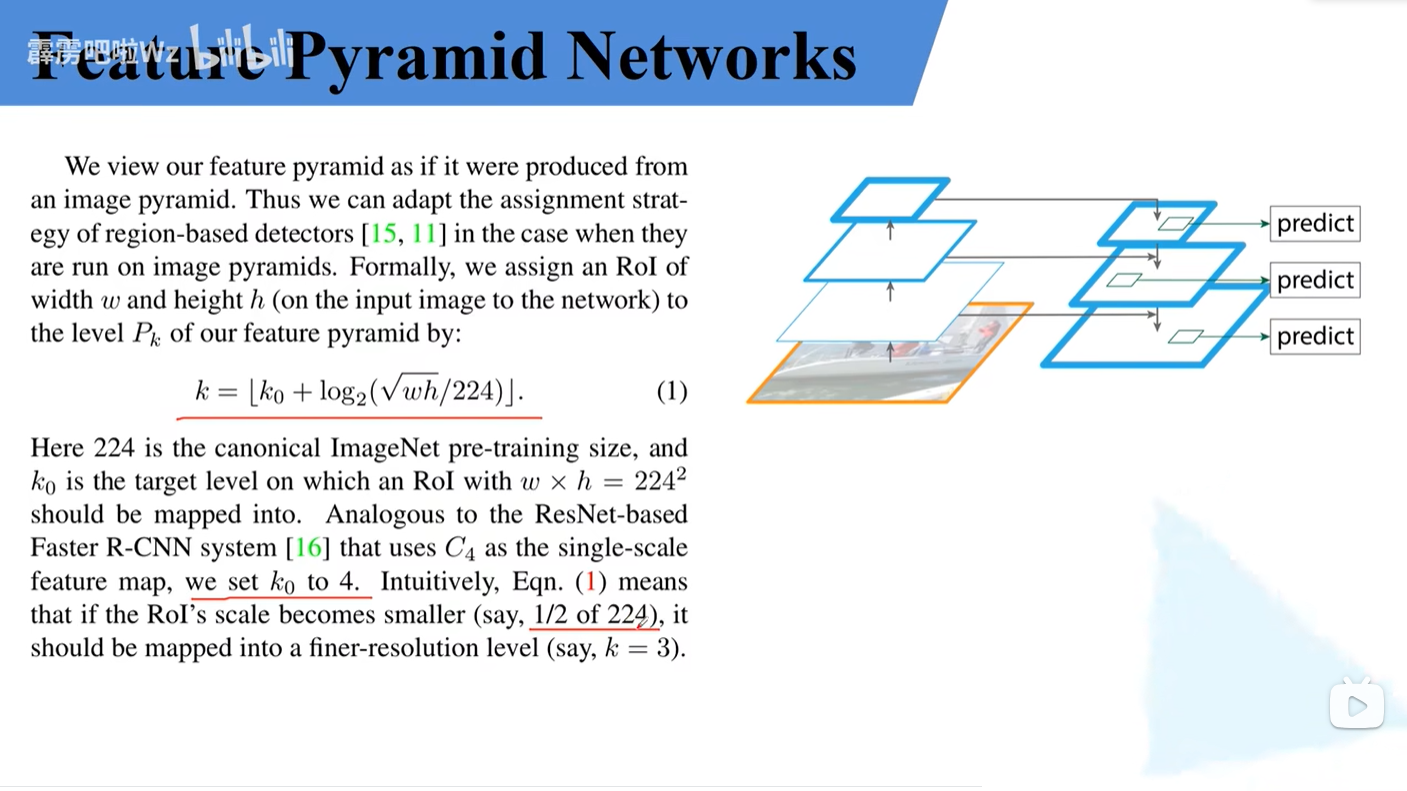

### 代码学习部分

In [1]:
# ctrl + 鼠标左键 跳转即可查看pytorch faster_rcnn实现
import torchvision.models.detection.faster_rcnn
import torch
from PIL import Image
import os
from torchvision import transforms

# 另外，pytorch vision部分的源码

In [2]:
image_folder_path = "../data/batch_images"
image_list = list()

transform = transforms.Compose([
    transforms.Resize((600, 800)),
    transforms.ToTensor()
])

for image_name in os.listdir(image_folder_path):
    image_path = os.path.join(image_folder_path, image_name)
    # print(f'image_name = {image_path}')
    image = Image.open(image_path)
    image_tensor = transform(image)
    image_list.append(image_tensor.unsqueeze(0))

In [3]:
from torchvision.models.detection.anchor_utils import AnchorGenerator, ImageList
# from torchvision.models.detection.rpn import AnchorGenerator
# from torchvision.models.detection.image_list import ImageList

# temp = torch.cat(image_list, dim=0)
# print(f'temp shape {temp.shape}')
# img_list = ImageList(temp, [(600, 800),]*len(image_list))
img_list = ImageList(image_list, [(600, 800),]*len(image_list))
print(f'img_list image size: {img_list.image_sizes}')

anchor_sizes = ((32,), (64,), (128,), (256,), (512,))
print(f'anchor_sizes = {anchor_sizes}')

aspect_ratios = ((0.5, 1.0, 2.0),) * len(anchor_sizes)
print(f'aspect_ratios = {aspect_ratios}')

img_list image size: [(600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800), (600, 800)]
anchor_sizes = ((32,), (64,), (128,), (256,), (512,))
aspect_ratios = ((0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0))


In [4]:
# rpn_anchor_generator = AnchorGenerator(
#     anchor_sizes, aspect_ratios
# )

# feature_maps = torch.randn((len(image_list), 512, 38, 50))
# print(f'feature_maps shape {feature_maps.shape}')

# anchors = rpn_anchor_generator(img_list, feature_maps)

[AnchorGenerator使用方法参考](https://blog.csdn.net/schmiloo/article/details/106900984)

In [5]:
image = torch.randn(1, 3, 600, 800)

# features

from torchvision.models.detection.backbone_utils import BackboneWithFPN

resnet = torchvision.models.resnet.resnet50()
return_layers = {'layer1': '0', 'layer2': '1', 'layer3': '2', 'layer4': '3'}
in_channels_stage2 = resnet.inplanes // 8
in_channels_list = [
    in_channels_stage2,
    in_channels_stage2 * 2,
    in_channels_stage2 * 4, 
    in_channels_stage2 * 8,
]
out_channels = 256
resnet_fpn = BackboneWithFPN(resnet, return_layers, in_channels_list, out_channels)

In [6]:
features = resnet_fpn(image)
print(type(features))
for key in features:
    print(f'{key} shape {features[key].shape}')

<class 'collections.OrderedDict'>
0 shape torch.Size([1, 256, 150, 200])
1 shape torch.Size([1, 256, 75, 100])
2 shape torch.Size([1, 256, 38, 50])
3 shape torch.Size([1, 256, 19, 25])
pool shape torch.Size([1, 256, 10, 13])


In [7]:
imglist = ImageList(image, [(600, 800)])
print(imglist.image_sizes)
# features_list = list(features.values())

rpn_anchor_generator = AnchorGenerator()
anchors = rpn_anchor_generator(imglist, features['2'])

print(type(anchors))
print(f'anchors len {len(anchors)}')
print(f'tensor shape {anchors[0].shape}')
print(anchors[0])

[(600, 800)]
<class 'list'>
anchors len 1
tensor shape torch.Size([17100, 4])
tensor([[ -91.,  -45.,   91.,   45.],
        [-181.,  -91.,  181.,   91.],
        [-362., -181.,  362.,  181.],
        ...,
        [ 739.,  464.,  829.,  646.],
        [ 693.,  374.,  875.,  736.],
        [ 603.,  193.,  965.,  917.]])
